# Class 4: Network Analysis with AI Capital Flows Data

This dataset contains real-world information about AI industry capital flows, including investments, partnerships, acquisitions, and business relationships between companies. Each row represents a deal or relationship between two entities, showing how money, resources, and partnerships flow through the AI ecosystem.


### Exercise 1: Network Visualization with Cosmograph
1. Go to [https://cosmograph.app/run/](https://cosmograph.app/run/)
2. Click "Load Graph" → Upload CSV → Select `export_deals.csv`
3. Explore the network visualization and identify patterns

### Exercise 2: Data Inspection in Excel
1. Open `export_deals.csv` in Excel
2. Examine the columns: `from_name`, `to_name`, `deal_type`, `amount_bn`
3. Look at the first 20 rows to understand the data structure

### Exercise 3: Load Data in Python
1. Import pandas
2. Load the `export_deals.csv` file
3. Display basic information about the dataset (shape, columns, first few rows)



In [62]:
import pandas as pd

# Load the dataset
df = pd.read_csv('export_deals.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()


Dataset shape: (732, 21)

Columns: ['Unnamed: 0', 'from_name', 'from_ticker', 'to_name', 'to_ticker', 'deal_type', 'subtype', 'amount_bn', 'amount_approx', 'scale_quantity', 'scale_unit', 'scale_approx', 'tenor_years', 'tenor_start', 'tenor_end', 'tenor_text', 'confidence_level', 'confidence_detail', 'source', 'from_group', 'to_group']

First 5 rows:


,Unnamed: 0,from_name,from_ticker,to_name,to_ticker,deal_type,subtype,amount_bn,amount_approx,scale_quantity,...,scale_approx,tenor_years,tenor_start,tenor_end,tenor_text,confidence_level,confidence_detail,source,from_group,to_group
0,0,General Catalyst; Spark Capital; Addition; Gre...,NaN,Adept,NaN,INVESTOR,Series B equity investment,0.350,False,NaN,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL,Adept press release (adept.ai),Adept,Other,Foundation Labs
1,1,Amazon,NaN,Adept,NaN,CONTENT_LICENSING,"agent technology, multimodal models, datasets",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,REPORTED,CNBC 2024-06-28,Adept,Hyperscalers,Foundation Labs
2,2,Adept,NaN,Oracle,NaN,CUSTOMER,cloud infrastructure GPU access,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL,Oracle PR 2024-06-11 via PR Newswire,Adept,Foundation Labs,Hyperscalers
3,3,AMD,AMD,Silo AI,NaN,MNA,Acquisition,0.665,False,NaN,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL,AMD press release 2024-07-10,Advanced Micro Devices,Semis & Systems,Other
4,4,AMD,AMD,ZT Systems,NaN,MNA,Acquisition,4.900,False,NaN,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL,AMD press release 2024-08-19,Advanced Micro Devices,Semis & Systems,Other


### Exercise 4: Explore Unique Companies
1. Print all unique company names from `from_name` column
2. Print all unique company names from `to_name` column
3. Find companies that appear in both columns


In [63]:
# Print unique companies from from_name column
print("Unique companies in from_name:")
unique_from = df['from_name'].unique()
print(f"Count: {len(unique_from)}")
for company in sorted(unique_from):
    if pd.notna(company):  # Skip NaN values
        print(f"- {company}")

print("\n" + "="*50 + "\n")

# Print unique companies from to_name column  
print("Unique companies in to_name:")
unique_to = df['to_name'].unique()
print(f"Count: {len(unique_to)}")
for company in sorted(unique_to):
    if pd.notna(company):  # Skip NaN values
        print(f"- {company}")

print("\n" + "="*50 + "\n")

# Find companies that appear in both columns
companies_in_both = set(unique_from) & set(unique_to)
companies_in_both = {c for c in companies_in_both if pd.notna(c)}  # Remove NaN
print("Companies that appear in both from_name and to_name:")
print(f"Count: {len(companies_in_both)}")
for company in sorted(companies_in_both):
    print(f"- {company}")


Unique companies in from_name:
Count: 187
- AI Bridge Funding LLC
- AMD
- ASE Technology
- ASML
- Accel
- Adept
- Agence France-Presse
- Alianza / GIC (via DC Brazil 1 / JV)
- Alianza Investimentos
- Alianza Trust Renda Imobiliária
- Aligned Data Centers
- Amazon
- Anchorage Lending CA, LLC
- Andra Capital
- Andreessen Horowitz
- Anthropic
- Apollo
- Apple
- Applied Digital
- Arista Board
- Avangrid
- Aware Super
- Axel Springer
- B. Riley Commercial Capital
- Bain Capital
- Banco Nacional de Desenvolvimento Econômico e Social
- Bezos Expeditions
- Bitfarms
- BlackRock
- Blackstone
- Blackstone-affiliated funds
- Block
- Bloom Energy Corporation
- Bradesco BBI / UBS BB / Santander / Itaú BBA
- Broadcom
- Brookfield Asset Management
- Brookfield Infrastructure Partners & Ontario Teachers’ Pension Plan
- ByteDance
- CIM APLD Lender Holdings, LLC
- CMA CGM
- CPP Investments
- CTC Property
- Caterpillar Power Finance
- Cerebras Systems
- Cisco Systems
- CleanMax
- Coatue Management
- Coatu


### Exercise 5: Most Mentioned Companies
1. Count how many times each company appears in `from_name`
2. Count how many times each company appears in `to_name`
3. Combine both counts to find total mentions
4. Display the top 20 most mentioned companies


In [64]:
# Count mentions in from_name
from_counts = df['from_name'].value_counts()

# Count mentions in to_name
to_counts = df['to_name'].value_counts()

# Combine both counts
total_mentions = {}
for company in set(list(from_counts.index) + list(to_counts.index)):
    if pd.notna(company):
        total_mentions[company] = from_counts.get(company, 0) + to_counts.get(company, 0)

# Sort by total mentions (descending)
sorted_mentions = sorted(total_mentions.items(), key=lambda x: x[1], reverse=True)

# Display top 20 most mentioned companies
print("Top 20 Most Mentioned Companies:")
print("="*60)
for i, (company, count) in enumerate(sorted_mentions[:20], 1):
    from_count = from_counts.get(company, 0)
    to_count = to_counts.get(company, 0)
    print(f"{i:2d}. {company:40s} Total: {count:3d} (from: {from_count:3d}, to: {to_count:3d})")


Top 20 Most Mentioned Companies:
 1. NVIDIA                                   Total:  72 (from:  19, to:  53)
 2. CoreWeave                                Total:  50 (from:  26, to:  24)
 3. OpenAI                                   Total:  47 (from:   0, to:  47)
 4. Microsoft                                Total:  39 (from:  24, to:  15)
 5. Google                                   Total:  33 (from:  21, to:  12)
 6. Meta                                     Total:  31 (from:  22, to:   9)
 7. Amazon                                   Total:  26 (from:  17, to:   9)
 8. Oracle                                   Total:  25 (from:  17, to:   8)
 9. AMD                                      Total:  22 (from:  14, to:   8)
10. Lambda                                   Total:  21 (from:   3, to:  18)
11. Mistral                                  Total:  20 (from:   5, to:  15)
12. Crusoe                                   Total:  18 (from:  16, to:   2)
13. Cohere                                 


### Questions to Class 1: Company Recognition

Looking at the top 20 most mentioned companies from Exercise 5:

1. Which of these companies have you heard of before?
2. What does each company do? What industry are they in?
3. Are there any companies you're surprised to see on this list?
4. Can you identify which companies are:
   - Tech giants (hyperscalers)?
   - AI startups?
   - Chip manufacturers?
   - Investment firms?
   - Infrastructure/data center companies?

### Exercise 6: Industry Group Analysis
1. Group the data by `from_group` column and count occurrences
2. Group the data by `to_group` column and count occurrences
3. Combine both counts to find which industry groups are most active
4. Display the results sorted by total activity


In [65]:
# Count occurrences in from_group
from_group_counts = df['from_group'].value_counts()

# Count occurrences in to_group
to_group_counts = df['to_group'].value_counts()

# Combine both counts
total_group_mentions = {}
for group in set(list(from_group_counts.index) + list(to_group_counts.index)):
    if pd.notna(group):
        total_group_mentions[group] = from_group_counts.get(group, 0) + to_group_counts.get(group, 0)

# Sort by total mentions (descending)
sorted_groups = sorted(total_group_mentions.items(), key=lambda x: x[1], reverse=True)

# Display results
print("Industry Group Activity:")
print("="*70)
for i, (group, count) in enumerate(sorted_groups, 1):
    from_count = from_group_counts.get(group, 0)
    to_count = to_group_counts.get(group, 0)
    print(f"{i:2d}. {group:30s} Total: {count:4d} (from: {from_count:4d}, to: {to_count:4d})")


Industry Group Activity:
 1. Other                          Total:  460 (from:  138, to:  322)
 2. Semis & Systems                Total:  280 (from:  178, to:  102)
 3. Hyperscalers                   Total:  229 (from:  124, to:  105)
 4. AI Clouds & Miners             Total:  190 (from:  116, to:   74)
 5. Data Centers                   Total:  107 (from:   50, to:   57)
 6. Capital Providers              Total:   83 (from:   72, to:   11)
 7. Foundation Labs                Total:   71 (from:   18, to:   53)
 8. Power & Energy                 Total:   44 (from:   36, to:    8)



### Exercise 7: Deal Value by Company
1. Group by `from_name` and sum the `amount_bn` values
2. Group by `to_name` and sum the `amount_bn` values
3. Combine both sums to find total deal value per company
4. Display the top 20 companies by total deal value in billions USD

In [66]:

# Group by from_name and sum amount_bn
from_value = df.groupby('from_name')['amount_bn'].sum()

# Group by to_name and sum amount_bn
to_value = df.groupby('to_name')['amount_bn'].sum()

# Combine both values
total_value = {}
for company in set(list(from_value.index) + list(to_value.index)):
    if pd.notna(company):
        total_value[company] = from_value.get(company, 0) + to_value.get(company, 0)

# Sort by total value (descending)
sorted_by_value = sorted(total_value.items(), key=lambda x: x[1], reverse=True)

# Display top 20 companies by deal value
print("\nTop 20 Companies by Total Deal Value:")
print("="*75)
for i, (company, value) in enumerate(sorted_by_value[:20], 1):
    from_val = from_value.get(company, 0)
    to_val = to_value.get(company, 0)
    print(f"{i:2d}. {company:40s} Total: ${value:6.2f}B (from: ${from_val:6.2f}B, to: ${to_val:6.2f}B)")



Top 20 Companies by Total Deal Value:
 1. OpenAI                                   Total: $399.75B (from: $  0.00B, to: $399.75B)
 2. NVIDIA                                   Total: $283.04B (from: $218.10B, to: $ 64.94B)
 3. Meta                                     Total: $163.75B (from: $ 78.90B, to: $ 84.85B)
 4. CoreWeave                                Total: $162.67B (from: $111.62B, to: $ 51.05B)
 5. SoftBank                                 Total: $137.25B (from: $136.88B, to: $  0.38B)
 6. Microsoft                                Total: $107.08B (from: $ 18.68B, to: $ 88.40B)
 7. Cisco Systems                            Total: $105.00B (from: $105.00B, to: $  0.00B)
 8. Apollo                                   Total: $ 87.80B (from: $ 52.80B, to: $ 35.00B)
 9. Broadcom                                 Total: $ 84.49B (from: $ 84.49B, to: $  0.00B)
10. VMware                                   Total: $ 84.19B (from: $  0.00B, to: $ 84.19B)
11. BlackRock                            


### Questions to Class 2: Group by 


The `groupby()` function in pandas is used to split data into groups based on some criteria, then apply a function to each group independently. 

**How it works:**
1. **Split**: The data is divided into groups based on the values in one or more columns
2. **Apply**: A function (like sum, mean, count, etc.) is applied to each group
3. **Combine**: The results are combined into a new data structure


### Exercise 8: Visualize Top 10 Companies by Deal Value
1. Extract the top 10 companies from Exercise 7 results
2. Create a horizontal bar chart showing total deal value
3. Add proper labels, title, and formatting
4. Display the chart

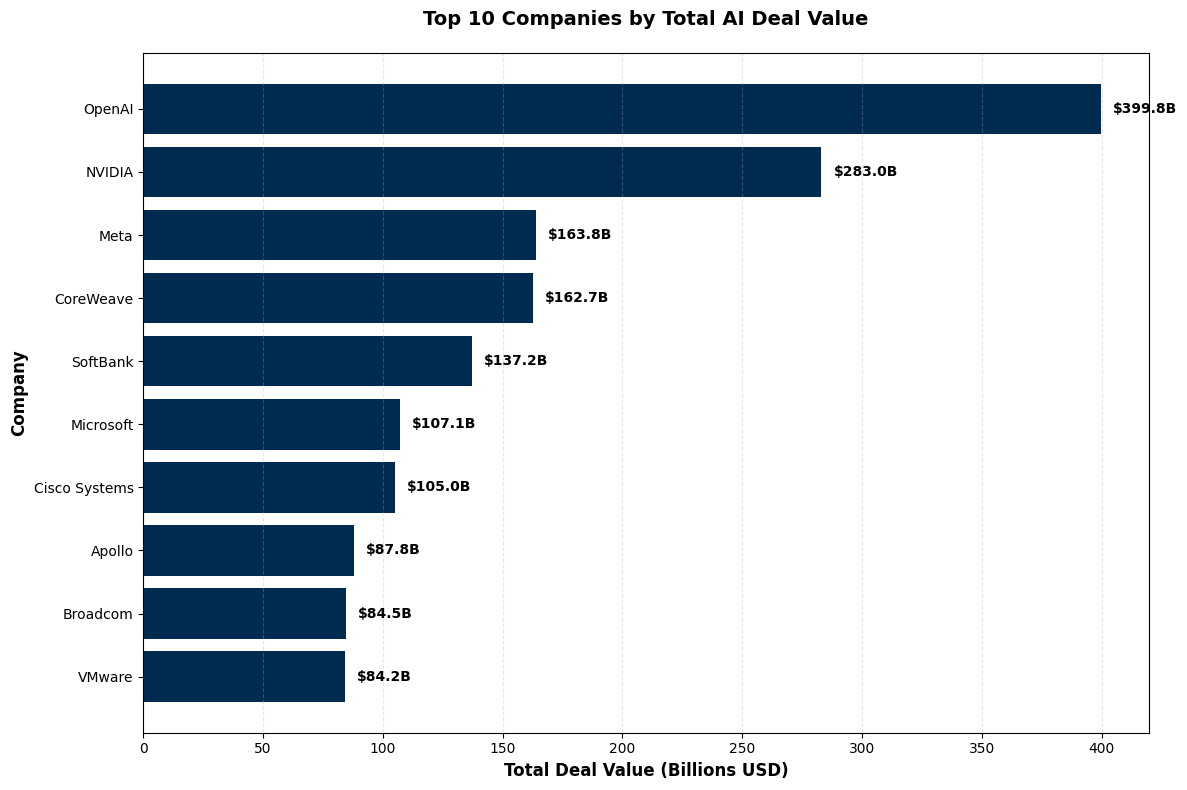

In [67]:
import matplotlib.pyplot as plt

# Get top 10 companies by deal value
top_10_companies = sorted_by_value[:10]
companies = [company for company, value in top_10_companies]
values = [value for company, value in top_10_companies]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(companies, values, color='#002B51')

# Add value labels on the bars
for i, (bar, value) in enumerate(zip(bars, values)):
    ax.text(value + 5, i, f'${value:.1f}B', va='center', fontsize=10, fontweight='bold')

# Formatting
ax.set_xlabel('Total Deal Value (Billions USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Company', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Companies by Total AI Deal Value', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Invert y-axis so highest value is on top
ax.invert_yaxis()

plt.tight_layout()
plt.show()


### Exercise 9: Deal Volume by Deal Type
1. Group the data by `deal_type` column
2. Sum the `amount_bn` values for each deal type
3. Create a bar chart showing the total deal volume by type
4. Display the chart with proper labels


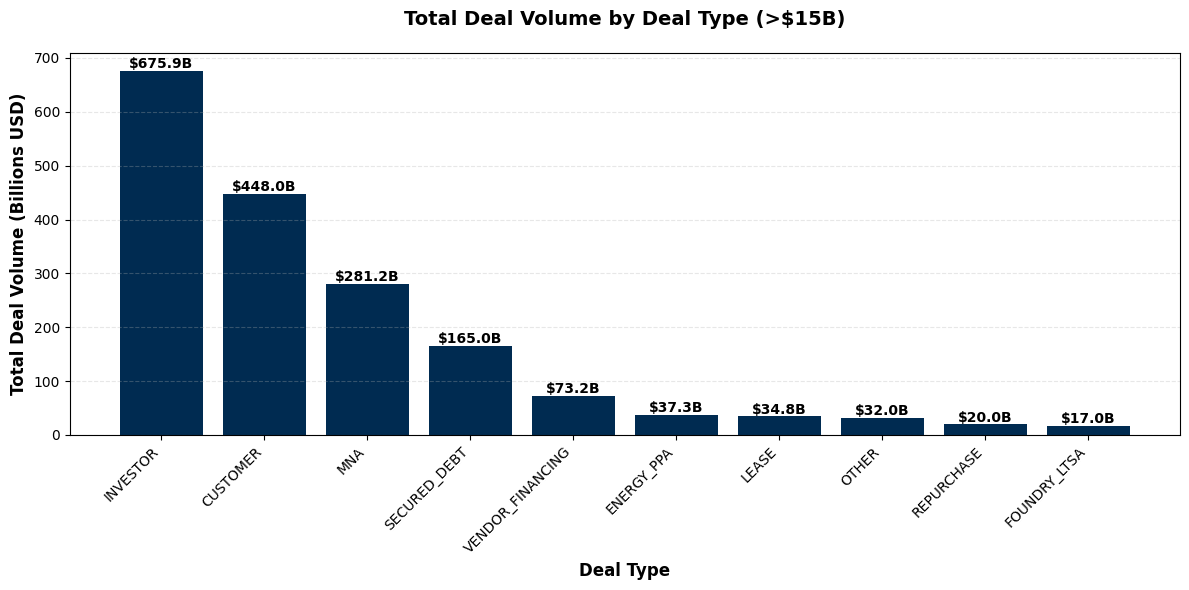


Deal Volume by Type (>$15B):
INVESTOR                       $  675.87B
CUSTOMER                       $  448.02B
MNA                            $  281.22B
SECURED_DEBT                   $  164.95B
VENDOR_FINANCING               $   73.19B
ENERGY_PPA                     $   37.27B
LEASE                          $   34.81B
OTHER                          $   32.00B
REPURCHASE                     $   20.03B
FOUNDRY_LTSA                   $   17.00B


In [68]:
import matplotlib.pyplot as plt

# Group by deal_type and sum amount_bn
deal_type_volume = df.groupby('deal_type')['amount_bn'].sum().sort_values(ascending=False)

# Filter to only show deal types with volume >= $15B
deal_type_volume_filtered = deal_type_volume[deal_type_volume >= 15]

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(len(deal_type_volume_filtered)), deal_type_volume_filtered.values, color='#002B51')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, deal_type_volume_filtered.values)):
    ax.text(i, value + 5, f'${value:.1f}B', ha='center', fontsize=10, fontweight='bold')

# Formatting
ax.set_xlabel('Deal Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Deal Volume (Billions USD)', fontsize=12, fontweight='bold')
ax.set_title('Total Deal Volume by Deal Type (>$15B)', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(len(deal_type_volume_filtered)))
ax.set_xticklabels(deal_type_volume_filtered.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print summary
print("\nDeal Volume by Type (>$15B):")
print("="*60)
for deal_type, volume in deal_type_volume_filtered.items():
    print(f"{deal_type:30s} ${volume:8.2f}B")


### Exercise 10: Deal Volume by Industry Group
1. Group by `from_group` and sum the `amount_bn` values
2. Group by `to_group` and sum the `amount_bn` values
3. Combine both to get total volume per industry group
4. Create a horizontal bar chart showing the results


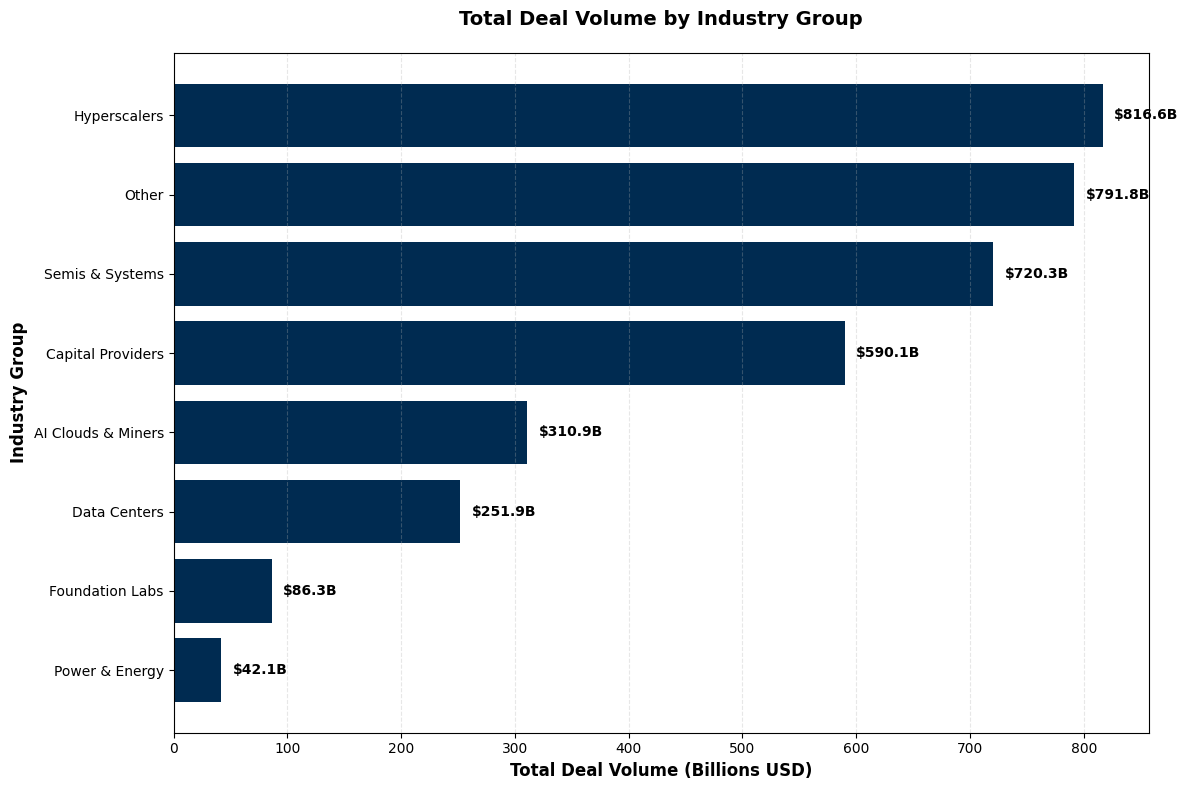


Industry Group Volume Breakdown:
 1. Hyperscalers                   Total: $ 816.56B (from: $ 182.06B, to: $ 634.50B)
 2. Other                          Total: $ 791.79B (from: $ 159.97B, to: $ 631.81B)
 3. Semis & Systems                Total: $ 720.29B (from: $ 588.74B, to: $ 131.56B)
 4. Capital Providers              Total: $ 590.07B (from: $ 494.15B, to: $  95.92B)
 5. AI Clouds & Miners             Total: $ 310.94B (from: $ 219.50B, to: $  91.44B)
 6. Data Centers                   Total: $ 251.90B (from: $  82.96B, to: $ 168.94B)
 7. Foundation Labs                Total: $  86.34B (from: $  38.25B, to: $  48.09B)
 8. Power & Energy                 Total: $  42.14B (from: $  39.38B, to: $   2.76B)


In [69]:
import matplotlib.pyplot as plt

# Group by from_group and sum amount_bn
from_group_volume = df.groupby('from_group')['amount_bn'].sum()

# Group by to_group and sum amount_bn
to_group_volume = df.groupby('to_group')['amount_bn'].sum()

# Combine both volumes
total_group_volume = {}
for group in set(list(from_group_volume.index) + list(to_group_volume.index)):
    if pd.notna(group):
        total_group_volume[group] = from_group_volume.get(group, 0) + to_group_volume.get(group, 0)

# Sort by total volume
sorted_groups = sorted(total_group_volume.items(), key=lambda x: x[1], reverse=True)
groups = [group for group, value in sorted_groups]
values = [value for group, value in sorted_groups]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(groups, values, color='#002B51')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, values)):
    ax.text(value + 10, i, f'${value:.1f}B', va='center', fontsize=10, fontweight='bold')

# Formatting
ax.set_xlabel('Total Deal Volume (Billions USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Industry Group', fontsize=12, fontweight='bold')
ax.set_title('Total Deal Volume by Industry Group', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Print detailed breakdown
print("\nIndustry Group Volume Breakdown:")
print("="*75)
for i, (group, total) in enumerate(sorted_groups, 1):
    from_val = from_group_volume.get(group, 0)
    to_val = to_group_volume.get(group, 0)
    print(f"{i:2d}. {group:30s} Total: ${total:7.2f}B (from: ${from_val:7.2f}B, to: ${to_val:7.2f}B)")
